In [2]:
!pip install gensim==4.3.1

  Using cached gensim-4.3.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathy 0.6.2 requires smart-open<6.0.0,>=5.2.1, but you have smart-open 6.3.0 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install wordcloud==1.8.2.2

  Using cached wordcloud-1.8.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)
  Using cached Pillow-9.5.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached matplotlib-3.7.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached contourpy-1.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached zipp-3.15.0-py3-none-any.whl (6.8 kB)
  Using cached six-1.16.0-py2.py3

In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn import svm
import random
from gensim.models import Word2Vec
import gensim.downloader as api
import string
import re
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# iPhone 11

In [7]:
df = pd.read_csv("/work/APPLE_iPhone_SE.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  9713 non-null   int64 
 1   Comment  9713 non-null   object
 2   Reviews  9713 non-null   object
dtypes: int64(1), object(2)
memory usage: 227.8+ KB


In [9]:
df

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...
...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE


In [10]:
df.dropna(inplace=True)

In [52]:
stop_words = set(stopwords.words('english'))
selected_words = ['iphone', 'apple', 'day', "don't", 'brought', 'amazon', 'one', 'good', 'read', 'awesome', 'product', 'came', 'life', 'review', 'purchased', 'price', 'purchase', 'phone', 'month', 'buy', 'got', 'battery', 'work', 'seller', 'awesomeread', 'goodread', 'phoneread', 'excellentread', 'niceread', 'productread']
stop_words.update(selected_words)

def process_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text


In [53]:
df['clean_text'] = df['Reviews'].apply(process_text)

## Sentiment Analysis

In [54]:
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [55]:
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

In [15]:
df

,Ratings,Comment,Reviews,clean_text,sentiment,sentiment_category
0,5,Super!,Great camera for pics and videos Battery life ...,great camera pics videos far setting turn neve...,0.7845,positive
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,great device let tell pros superb build qualit...,0.9880,positive
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",loves older size ie inch type definitely go no...,0.8479,positive
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,se best ever get beautifully designed gives cl...,0.9458,positive
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,second ive long time android user ill tell pro...,0.4247,positive
...,...,...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,absolutely brilliantread,0.0000,negative
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",superb th feel se thinnest pocket friendly pro...,0.8074,positive
9710,5,Awesome,very niceREAD MORE,niceread,0.0000,negative
9711,5,Super!,Loving it as of now. Good Product .READ MORE,loving read,0.5994,positive


In [56]:
positive_text = df[df['sentiment_category'] == 'positive']
negative_text = df[df['sentiment_category'] == 'negative']

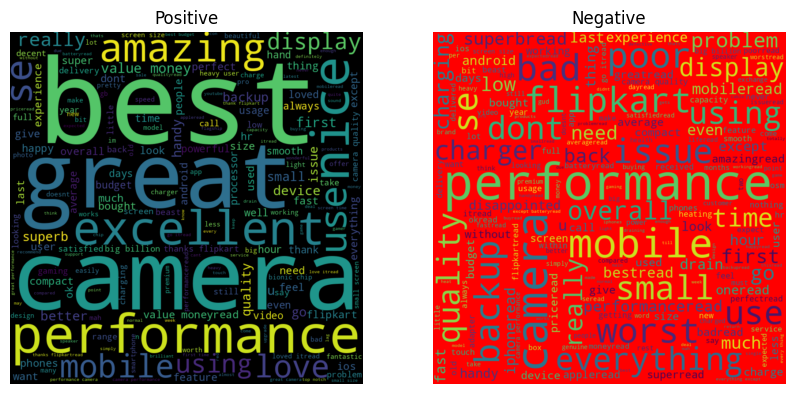

In [57]:
stop_words = set(STOPWORDS)

positive_cloud = WordCloud(stopwords=stop_words, width=800, height=800, background_color='black', min_font_size=10).generate(' '.join(positive_text['clean_text']))
negative_cloud = WordCloud(stopwords=stop_words, width=800, height=800, background_color='red', min_font_size=10).generate(' '.join(negative_text['clean_text']))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(positive_cloud, interpolation='bilinear')
axes[0].set_title('Positive')
axes[0].axis('off')
axes[1].imshow(negative_cloud, interpolation='bilinear')
axes[1].set_title('Negative')
axes[1].axis('off')
plt.show()

### lowest sentiment text

In [19]:
lowest_sentiment_row = df.sort_values(by='sentiment').iloc[0]
print('Review text:', lowest_sentiment_row['Reviews'])
print('Sentiment score:', lowest_sentiment_row['sentiment'])

Review text: Before buy this phone... Just read the following drawback...1.Display is the worst part of this phone, so much tiny, and not good display as Amoled. It's just an bad LCD display.2.Battery Life too much worst. If you play pubg for 1hour It's drop 75%😭. For daily normal use, It's last only for 3.5 hour... Don't expect much from 1800Mah approx battery.3.RAM  managements is not good at all. It kill the heavy graphics application. Its not avoidable in the price range 40K.4.I feel processor is...READ MORE
Sentiment score: -0.9524


### highest sentiment text

In [20]:
highest_sentiment_row = df.sort_values('sentiment', ascending=False).iloc[0]
print('Review text:', highest_sentiment_row['Reviews'])
print('Sentiment score:', highest_sentiment_row['sentiment'])


Review text: Beautiful phone. Single camera is not great, but for sure the usability of it with the power of a13 chip is good. Plus very simple and easy to hold in hand without dropping it. No need of a back cover as it's easily held in hand. Loved it more than my 11 Pro. Flipkart sale was awesome, I got the best deal for waiting to buy this phone for a long long time. I got it at a deal of 30k after all discounts. Brilliant one for the price point. Best phone for any one. Thank you Flipkart for making ...READ MORE
Sentiment score: 0.9926


In [21]:
def clean_text(review_text):
    if isinstance(review_text, str):
        text = review_text.lower() # Convert to lowercase
        tokens = word_tokenize(text) # Tokenize the text
        tokens = [word for word in tokens if word.isalpha()] # Remove punctuation
        tokens = [word for word in tokens if word not in stop_words] # Remove stop words
        return tokens
    else:
        return ""

In [22]:
data =  positive_text + negative_text
labels = ['Positive'] * len(positive_text) + ['Negative']

In [23]:
data = [clean_text(text) for text in data['Reviews']]

vectorizer = TfidfVectorizer()
text_data = vectorizer.fit_transform(df['clean_text'].values.astype('U')) # Convert to Unicode string

labels = df['Reviews'].values

In [24]:

train_data, test_data, train_labels, test_labels = train_test_split(text_data, labels, test_size=0.4, random_state=42)

imputer = SimpleImputer(strategy='mean')
train_data = imputer.fit_transform(train_data)


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.1098816263510036


## Naive Bayes 

In [ ]:
model = MultinomialNB()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.08389089037570767


## Random Forest 

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_data, train_labels)

y_pred = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.08389089037570767


# under-sampled

In [25]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
train_data, train_labels = rus.fit_resample(train_data, train_labels)

# LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.02959341224909933


# NaiveBayes

In [27]:
model = MultinomialNB()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.02161605764282038


# RandomForest

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_data, train_labels)

y_pred = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.02161605764282038


#########

In [30]:
selected_word = input('Enter a word to search for: ')
selected_reviews = df[df['clean_text'].str.contains(selected_word)]

sid = SentimentIntensityAnalyzer()
selected_reviews['sentiment_score'] = selected_reviews['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])
positive_reviews = selected_reviews[selected_reviews['sentiment_score'] > 0]
negative_reviews = selected_reviews[selected_reviews['sentiment_score'] <= 0]

# Print out the selected reviews by sentiment category
print(f"Positive reviews containing the word '{selected_word}':")
for review_text in positive_reviews['Reviews']:
    print(review_text)

print(f"\nNegative reviews containing the word '{selected_word}':")
for review_text in negative_reviews['Reviews']:
    print(review_text)

Day one, slipped from my hand, took a hit on display side from 5ft height.... no damage to the iPhone...great thank you. Touch, display, camera and other in built features are great, home button a bit hard and yes a little extra battery life was neededREAD MORE
Top class camera with security.READ MORE
Miracle Performance Camera is good only for multimedia and basic users worth mobileREAD MORE
Best camera but battery is lowREAD MORE
Best iPhone for this price…as it is small device definitely it has average battery life but u will love it , because of performance and cameraREAD MORE
I am writing review after using 1 month. The battery backup good and camera is also better. Overall I loved it.READ MORE
Great device in all aspects, performance, excellent camera, 4K video, sound quality.READ MORE
Awesome!!It's a little monster. one single 12 MP camera can beat triple or quad camera phones of this price range. A little much battery could be helpful.  Performance does not need to describe!!RE

In [31]:
positive_selected_reviews = selected_reviews[(selected_reviews['sentiment_score'] > 0)]
num_positive_selected = len(positive_selected_reviews[positive_selected_reviews['clean_text'].str.contains(selected_word)])
num_total_selected = len(selected_reviews[selected_reviews['clean_text'].str.contains(selected_word)])
positive_percentage = num_positive_selected / num_total_selected * 100                           

# Print out the percentage of positive reviews containing the selected word
print(f"Percentage of positive reviews containing the word '{selected_word}': {positive_percentage:.2f}%")

Percentage of positive reviews containing the word 'camera': 84.66%


In [32]:
negative_selected_reviews = selected_reviews[(selected_reviews['sentiment_score'] <= 0)]
num_negative_selected = len(negative_selected_reviews[negative_selected_reviews['clean_text'].str.contains(selected_word)])
num_total_selected = len(selected_reviews[selected_reviews['clean_text'].str.contains(selected_word)])
negative_percentage = num_negative_selected / num_total_selected * 100                           

# Print out the percentage of negative reviews containing the selected word
print(f"Percentage of negative reviews containing the word '{selected_word}': {negative_percentage:.2f}%")

Percentage of negative reviews containing the word 'camera': 15.34%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=320e99cb-8487-44b0-a3ee-3aa3add03759' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>